In [46]:
"""
*******************************************************************************

Project: RL, assignment 1
File: warehouse_robot_env.ipynb
Author: Hamid Manouchehri
Email: hmanouch@buffalo.edu
Date: Feb 7, 2025

Description:
Checkpoint 1, preparing an RL environment
Environmet Scenario: Warehouse Robot

License:
This script is licensed under the MIT License.
You may obtain a copy of the License at
    https://opensource.org/licenses/MIT

SPDX-License-Identifier: MIT

Disclaimer:
This software is provided "as is", without warranty of any kind, express or
implied, including but not limited to the warranties of merchantability,
fitness for a particular purpose, and noninfringement. In no event shall the
authors be liable for any claim, damages, or other liability, whether in an
action of contract, tort, or otherwise, arising from, out of, or in connection
with the software or the use or other dealings in the software.

*******************************************************************************
"""

'\n*******************************************************************************\n\nProject: RL\nFile: warehouse_robot_env.ipynb\nAuthor: Hamid Manouchehri\nEmail: hmanouch@buffalo.edu\nDate: Feb 7, 2025\n\nDescription:\nCheckpoint 1, preparing an RL environment\nEnvironmet Scenario: Warehouse Robot\n\nLicense:\nThis script is licensed under the MIT License.\nYou may obtain a copy of the License at\n    https://opensource.org/licenses/MIT\n\nSPDX-License-Identifier: MIT\n\nDisclaimer:\nThis software is provided "as is", without warranty of any kind, express or\nimplied, including but not limited to the warranties of merchantability,\nfitness for a particular purpose, and noninfringement. In no event shall the\nauthors be liable for any claim, damages, or other liability, whether in an\naction of contract, tort, or otherwise, arising from, out of, or in connection\nwith the software or the use or other dealings in the software.\n\n******************************************************

In [2]:
!pip install gymnasium matplotlib numpy

In [21]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

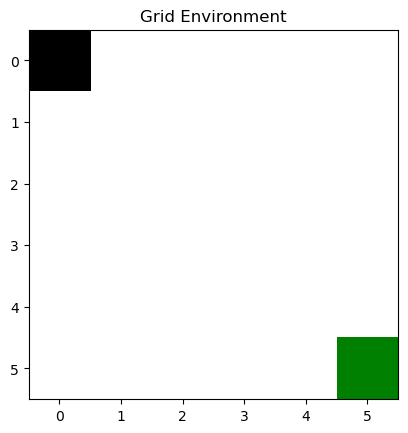

In [61]:
grid_size = 6
grid = np.ones((grid_size, grid_size, 3))
# Define grid size
grid_size = 6  # 6x6 grid

# Initialize grid with default background (White = 4)
grid = np.full((grid_size, grid_size), 1, dtype=int)  # Default to background

# Define agent and goal positions
init_agent_pos = [0, 0]  # Start position
goal_pos = [5, 5]  # Goal position

# Define integer-based color mapping
rgb_colors = {
    "black": 0,   # Agent
    "white": 1,   # Goal
    "red": 2,     # Trap
    "blue": 3,    # Water
    "green": 4,   # Background
    "gray": 5     # Obstacle
}

# Define color list for visualization
color_map = {
    0: "black",
    1: "white",
    2: "red",
    3: "blue",
    4: "green",
    5: "gray"
}

# Assign integer values to the grid
grid[tuple(init_agent_pos)] = rgb_colors["black"]  # Agent
grid[tuple(goal_pos)] = rgb_colors["green"]  # Goal

# Create a colormap using actual colors
cmap = mcolors.ListedColormap([color_map[i] for i in range(len(color_map))])

# Display the grid with correct colors
plt.imshow(grid, cmap=cmap, vmin=0, vmax=len(color_map) - 1)
plt.title("Grid Environment")
plt.show()


In [62]:
# Definition of the Grid Environment class.

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):
        # Initializes the class
        # Define action and observation space
        self.observation_space = spaces.Discrete(36)
        self.action_space = spaces.Discrete(6)
        self.max_timesteps = 5
        self.reward = 0
        
        self.timestep = 0
        self.agent_carry_obj = False
        self.agent_pos = [0, 0]
        self.goal_pos = [5, 5]
        self.object_pos = [1, 2]
        self.obstacle_1_pos = [2, 2]

        self.state = np.ones((6,6))
        self.state[tuple(self.agent_pos)] = rgb_colors["black"]
        self.state[tuple(self.goal_pos)] = rgb_colors["green"]
        self.state[tuple(self.object_pos)] = rgb_colors["blue"]
        self.state[tuple(self.obstacle_1_pos)] = rgb_colors["red"]

    # Reset function
    def reset(self, **kwargs):
        self.agent_carry_obj = False
        self.agent_pos = [0, 0]
        self.goal_pos = [5, 5]
        self.object_pos = [1, 2]
        self.obstacle_1_pos = [2, 2]
        self.reward = 0
        self.timestep = 0
        self.state = np.ones((6,6))
        self.state[tuple(self.agent_pos)] = rgb_colors["black"]
        self.state[tuple(self.goal_pos)] = rgb_colors["green"]
        self.state[tuple(self.object_pos)] = rgb_colors["blue"]
        self.state[tuple(self.obstacle_1_pos)] = rgb_colors["red"]
        observation = self.state.flatten()
        
        info = {}
        
        return observation, info


    def pick_up_obj(self):
        self.state[tuple(self.object_pos)] = rgb_colors["white"]
        self.agent_carry_obj = True


    def drop_off_obj(self):
        self.state[tuple(self.goal_pos)] = rgb_colors["white"]
        self.agent_carry_obj = False


    def step(self, action):
        self.reward -= 1
        # Executes one timestep within the environment
        # Input to the function is an action
        
        if action == 'down':
            self.agent_pos[0] += 1
            
        if action == 'up':
            self.agent_pos[0] -= 1
            
        if action == 'right':
            self.agent_pos[1] += 1
            
        if action == 'left':
            self.agent_pos[1] -= 1
    

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 5)
        
        self.state = np.ones((6,6))
        self.state[tuple(self.agent_pos)] = rgb_colors["black"]
        self.state[tuple(self.goal_pos)] = rgb_colors["green"]
        self.state[tuple(self.object_pos)] = rgb_colors["blue"]
        self.state[tuple(self.obstacle_1_pos)] = rgb_colors["red"]
        observation = self.state.flatten()
        

        if np.array_equal(self.agent_pos, self.object_pos) and (self.agent_carry_obj == False):
            self.pick_up_obj()
            self.reward += 25


        if np.array_equal(self.agent_pos, self.goal_pos) and (self.agent_carry_obj == True):
            self.drop_off_obj()
            self.reward += 100
            

        if np.array_equal(self.agent_pos, self.obstacle_1_pos):
            self.reward -= 25
        
        self.timestep += 1
        

        # Condition to check for termination (episode is over)
        if self.timestep >= self.max_timesteps:
            terminated = True
        else:
            terminated = False
        

        # Condition to check if agent is traversing to a cell beyond the permitted cells
        # This helps the agent to learn how to behave in a safe and predictable manner
        if np.all((np.asarray(self.agent_pos) >= 0) & (np.asarray(self.agent_pos) <= 5)):
            truncated = True
        else:
            truncated = False

        
        info = {}
        
        return observation, self.reward, terminated, truncated, info, self.agent_pos


    # Render function: Visualizes the environment
    def render(self):
        cmap = mcolors.ListedColormap([color_map[i] for i in range(len(color_map))])
        # Display the grid with correct colors
        plt.imshow(self.state, cmap=cmap, vmin=0, vmax=len(color_map) - 1)
        plt.title("Grid Environment")
        plt.show()

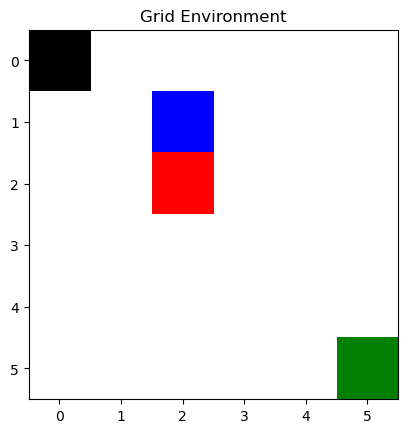

In [63]:
env = GridEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()

reward:  -1 agent pos:  [0 0]


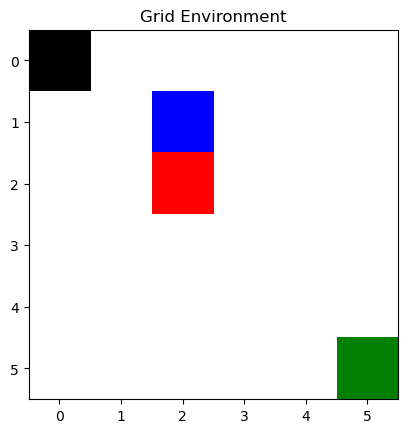

In [64]:
action = 'up'
observation, reward, done, truncated, info, agent_pos = env.step(action)
print("reward: ", reward, "agent pos: ", agent_pos)
env.render()

reward:  -14 agent pos:  [5 0]


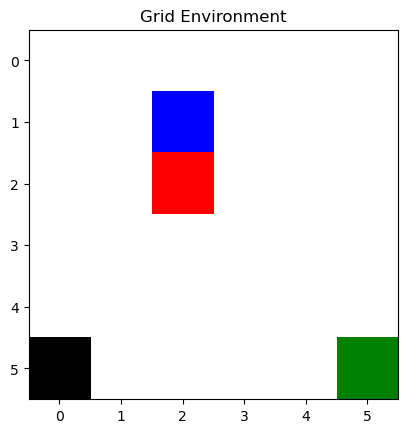

In [77]:
action = 'down'
observation, reward, done, truncated, info, agent_pos = env.step(action)
print("reward: ", reward, "agent pos: ", agent_pos)
env.render()

reward:  -26 agent pos:  [5 5]


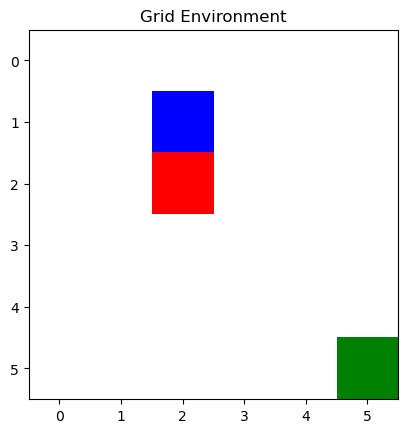

In [89]:
action = 'right'
observation, reward, done, truncated, info, agent_pos = env.step(action)
print("reward: ", reward, "agent pos: ", agent_pos)
env.render()

reward:  -6 agent pos:  [0 0]


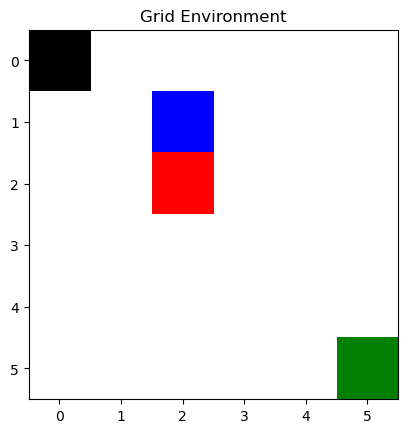

In [97]:
action = 'left'
observation, reward, done, truncated, info, agent_pos = env.step(action)
print("reward: ", reward, "agent pos: ", agent_pos)
env.render()

In [90]:
# Definition an agent that takes action randomly
class RandomAgent:

    def __init__(self, env):
        self.env = env
        self.stochasticity = 0.9  # TODO
        self.observation_space = env.observation_space
        self.action_space = env.action_space


    def step(self, obs):
        """Takes a step in the environment by choosing an action randomly.

        Args:
            obs: The current observation.

        Returns:
            The action to take.
        """
        return np.random.choice(self.action_space.n)

In [91]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  # random_agent = RandomAgent(env)

  obs, info = env.reset()
  print(obs)
  terminated, truncated = False, False

  # while not terminated:
    
  #   action = random_agent.step(obs)
  #   obs, reward, terminated, truncated, info = env.step(action)
  #   print('Action:', action, ', Reward:', reward, ', Done:', terminated)
  #   env.render()

[0. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4.]


In [ ]:
if __name__ == '__main__':
  env = GridEnvironment()
  random_agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  # while not terminated:
    
  #   action = random_agent.step(obs)
  #   obs, reward, terminated, truncated, info = env.step(action)
  #   print('Action:', action, ', Reward:', reward, ', Done:', terminated)
  #   env.render()

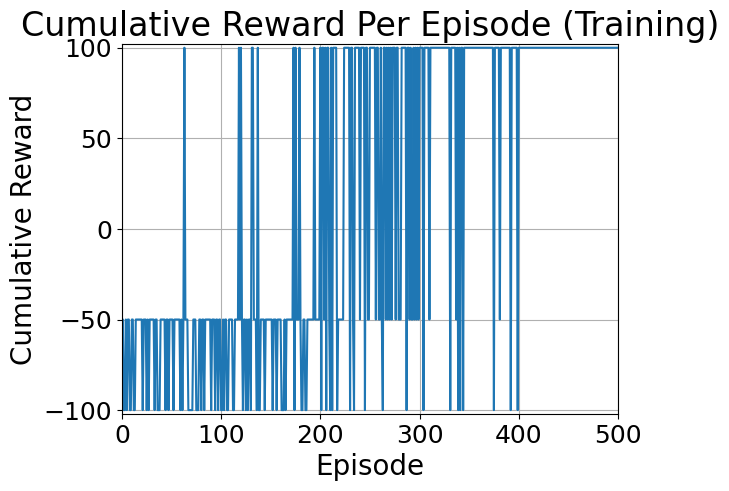

In [65]:
# Generating reward values for sample graph
initial_rewards = np.random.choice([-50, -100, 100], 100, p=[0.7, 0.29, 0.01])
intermediate_rewards = np.random.choice([-50, -100, 100], 100, p=[0.6, 0.25, 0.15])
final_rewards_1 = np.random.choice([-50, -100, 100], 100, p=[0.3, 0.1, 0.6])
final_rewards_2 = np.random.choice([-50, -100, 100], 100, p=[0.05, 0.05, 0.9])
final_rewards_3 = np.random.choice([-50, -100, 100], 100, p=[0.00, 0.00, 1])

reward_per_episode = np.concatenate((initial_rewards, intermediate_rewards,
                                    final_rewards_1, final_rewards_2, final_rewards_3))

# Reward Dynamics: Sample example
plt.figure()
plt.plot(reward_per_episode)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Training)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([-100, -50, 0, 50, 100], fontsize=18)
plt.ylim(ymin=-102, ymax=102)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

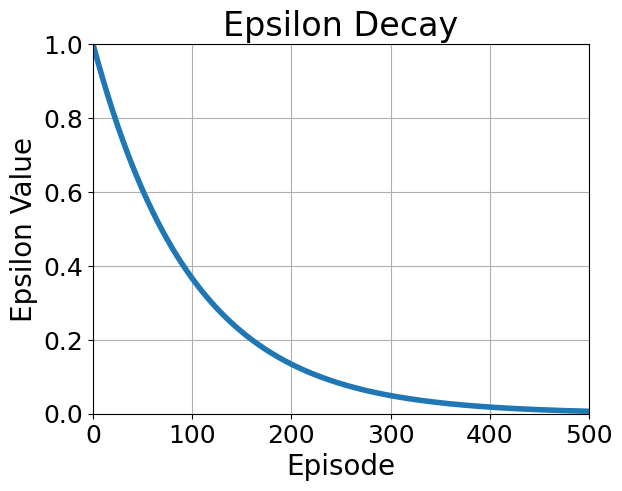

In [45]:
# Generating epsilon values for a sample graph
epsilon_values = [(0.99 ** i) * 1 for i in range(500)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()